## 4.Model Building

Here we use Naive Bayes to build a model.

for that:
* Vectorize Data using Bag of Words.
* Will give it to Naive Bayes as a input for finding accuracy to find out the performance.


Step 1:

In [515]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [516]:
df = pd.read_csv('../Data/preprocessed/transform_data.csv')

Convert transformed_text to string format for vectorization.

In [517]:
df['transformed_text'] = df['transformed_text'].astype(str)

In [518]:
X = tfidf.fit_transform(df['transformed_text'])

In [519]:
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# X = scaler.fit_transform(X)

In [520]:
# Appending the num_character col to X
# X = np.hstack((X, df["num_characters"].values.reshape(-1, 1)))

In [521]:
X.shape

(5169, 3000)

In [522]:
y = df['target'].values

In [523]:
y

array([0, 0, 1, ..., 0, 0, 0], shape=(5169,))

In [524]:
from sklearn.model_selection import train_test_split

Step 2:

In [525]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [526]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [527]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [528]:
X_train_dense = X_train.toarray()
X_test_dense = X_test.toarray()
gnb.fit(X_train_dense, y_train)
y_pred1 = gnb.predict(X_test_dense)
print(accuracy_score(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))
print(precision_score(y_test, y_pred1))

0.8752417794970987
[[791 105]
 [ 24 114]]
0.5205479452054794


In [529]:
mnb.fit(X_train, y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))
print(precision_score(y_test, y_pred2))

0.971953578336557
[[896   0]
 [ 29 109]]
1.0


In [530]:
bnb.fit(X_train, y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test, y_pred3))
print(confusion_matrix(y_test, y_pred3))
print(precision_score(y_test, y_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


Here we have two options one is Multinomial Naive bayes and one is Bernoulli Naive Bayes in case of CountVectorizer precision and accuracy of Bernoulli is high and the others are low while in case of tfidfVectorizer precision and accuracy of Multinomial is more high while the bernoulli is same as CountVectorizer.

> And in this project precision score matters as much as higher than accuracy score. So we will focus on precision score.
> So our choice is tfidf.

In [531]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [532]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', l1_ratio=1)
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50, random_state=2)
xgb = XGBClassifier(n_estimators=50, random_state=2)

In [533]:
clfs = {
    'SVC': svc,
    'KN': knc,
    'NB': mnb,
    'DT': dtc,
    'LR': lrc,
    'RF': rfc,
    'AdaBoost': abc,
    'BgC': bc,
    'ETC': etc,
    'GBDT': gbdt,
    'xgb': xgb,
}

In [534]:
def train_classifier(clf, X_train, y_train, X_test, y_test):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)

    return accuracy, precision

In [535]:
train_classifier(svc, X_train, y_train, X_test, y_test)

(0.9758220502901354, 0.9747899159663865)

In [536]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():

    current_accuracy, current_precision = train_classifier(clf, X_train, y_train, X_test, y_test)

    print(f"For {name}")
    print(f"Accuracy - {current_accuracy}")
    print(f"Precision - {current_precision}")

    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For SVC
Accuracy - 0.9758220502901354
Precision - 0.9747899159663865
For KN
Accuracy - 0.90715667311412
Precision - 1.0
For NB
Accuracy - 0.971953578336557
Precision - 1.0
For DT
Accuracy - 0.9342359767891683
Precision - 0.85
For LR
Accuracy - 0.9555125725338491
Precision - 0.96
For RF
Accuracy - 0.9748549323017408
Precision - 0.9912280701754386
For AdaBoost
Accuracy - 0.9216634429400387
Precision - 0.8202247191011236
For BgC
Accuracy - 0.9574468085106383
Precision - 0.8671875
For ETC
Accuracy - 0.9777562862669246
Precision - 0.9752066115702479
For GBDT
Accuracy - 0.9506769825918762
Precision - 0.9306930693069307
For xgb
Accuracy - 0.9671179883945842
Precision - 0.9262295081967213


In [537]:
performance_df = pd.DataFrame({
    "Algorithm": clfs.keys(),
    "Accuracy": accuracy_scores,
    "Precision": precision_scores,
}).sort_values("Precision", ascending=False)

In [538]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.907157,1.000000
2,NB,0.971954,1.000000
5,RF,0.974855,0.991228
8,ETC,0.977756,0.975207
0,SVC,0.975822,0.974790
4,LR,0.955513,0.960000
9,GBDT,0.950677,0.930693
10,xgb,0.967118,0.926230
7,BgC,0.957447,0.867188
3,DT,0.934236,0.850000


In [539]:
performance_long = performance_df.melt(
    id_vars="Algorithm",
    var_name="variable",
    value_name="value"
)
performance_long

,Algorithm,variable,value
0,KN,Accuracy,0.907157
1,NB,Accuracy,0.971954
2,RF,Accuracy,0.974855
3,ETC,Accuracy,0.977756
4,SVC,Accuracy,0.975822
5,LR,Accuracy,0.955513
6,GBDT,Accuracy,0.950677
7,xgb,Accuracy,0.967118
8,BgC,Accuracy,0.957447
9,DT,Accuracy,0.934236


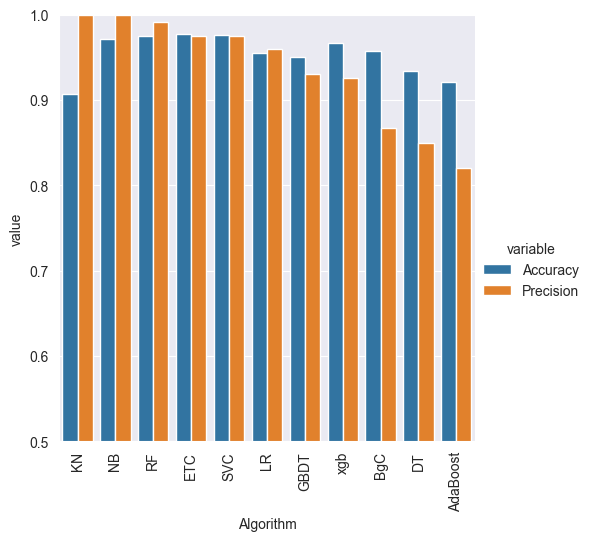

In [540]:
sns.catplot(x = "Algorithm", y = "value",
            hue = "variable", data = performance_long, kind="bar", height=5)
plt.ylim(0.5, 1.0)
plt.xticks(rotation=90)
plt.show()

### Improve Model
1. Change the max_features parameter of TfIdf.

In [541]:
temp_df = pd.DataFrame({"Algorithm": clfs.keys(),
                        "Accuracy_max_ft_3000": accuracy_scores,
                        "Precision_max_ft_3000": precision_scores,
                        })

In [542]:
temp_df1 = pd.DataFrame({"Algorithm": clfs.keys(),
                        "Accuracy_scaling": accuracy_scores,
                        "Precision_scaling": precision_scores,})

In [543]:
new_df = performance_df.merge(temp_df, on="Algorithm")

In [544]:
new_df_scaled = new_df.merge(temp_df1, on="Algorithm")

In [545]:
new_df_scaled

,Algorithm,Accuracy,Precision,Accuracy_max_ft_3000,Precision_max_ft_3000,Accuracy_scaling,Precision_scaling
0,KN,0.907157,1.000000,0.907157,1.000000,0.907157,1.000000
1,NB,0.971954,1.000000,0.971954,1.000000,0.971954,1.000000
2,RF,0.974855,0.991228,0.974855,0.991228,0.974855,0.991228
3,ETC,0.977756,0.975207,0.977756,0.975207,0.977756,0.975207
4,SVC,0.975822,0.974790,0.975822,0.974790,0.975822,0.974790
5,LR,0.955513,0.960000,0.955513,0.960000,0.955513,0.960000
6,GBDT,0.950677,0.930693,0.950677,0.930693,0.950677,0.930693
7,xgb,0.967118,0.926230,0.967118,0.926230,0.967118,0.926230
8,BgC,0.957447,0.867188,0.957447,0.867188,0.957447,0.867188
9,DT,0.934236,0.850000,0.934236,0.850000,0.934236,0.850000


### Voting Classifier

In [546]:
svc = SVC(kernel='sigmoid', gamma=1.0, probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [547]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)], voting='soft')

In [548]:
voting.fit(X_train, y_train)

,"estimators estimators: list of (str, estimator) tuplesInvoking the ``fit`` method on the ``VotingClassifier`` will fit clonesof those original estimators that will be stored in the class attribute``self.estimators_``. An estimator can be set to ``'drop'`` using:meth:`set_params`... versionchanged:: 0.21 ``'drop'`` is accepted. Using None was deprecated in 0.22 and support was removed in 0.24.","[('svm', ...), ('nb', ...), ...]"
,"voting voting: {'hard', 'soft'}, default='hard'If 'hard', uses predicted class labels for majority rule voting.Else if 'soft', predicts the class label based on the argmax ofthe sums of the predicted probabilities, which is recommended foran ensemble of well-calibrated classifiers.",'soft'
,"weights weights: array-like of shape (n_classifiers,), default=NoneSequence of weights (`float` or `int`) to weight the occurrences ofpredicted class labels (`hard` voting) or class probabilitiesbefore averaging (`soft` voting). Uses uniform weights if `None`.",None
,"n_jobs n_jobs: int, default=NoneThe number of jobs to run in parallel for ``fit``.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details... versionadded:: 0.18",None
,"flatten_transform flatten_transform: bool, default=TrueAffects shape of transform output only when voting='soft'If voting='soft' and flatten_transform=True, transform method returnsmatrix with shape (n_samples, n_classifiers * n_classes). Ifflatten_transform=False, it returns(n_classifiers, n_samples, n_classes).",True
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting will be printed as itis completed... versionadded:: 0.23",False
,"C C: float, default=1.0Regularization parameter. The strength of the regularization isinversely proportional to C. Must be strictly positive. The penaltyis a squared l2 penalty. For an intuitive visualization of the effectsof scaling the regularization parameter C, see:ref:`sphx_glr_auto_examples_svm_plot_svm_scale_c.py`.",1.0
,"kernel kernel: {'linear', 'poly', 'rbf', 'sigmoid', 'precomputed'} or callable, default='rbf'Specifies the kernel type to be used in the algorithm. Ifnone is given, 'rbf' will be used. If a callable is given it is used topre-compute the kernel matrix from data matrices; that matrix should bean array of shape ``(n_samples, n_samples)``. For an intuitivevisualization of different kernel types see:ref:`sphx_glr_auto_examples_svm_plot_svm_kernels.py`.",'sigmoid'
,"degree degree: int, default=3Degree of the polynomial kernel function ('poly').Must be non-negative. Ignored by all other kernels.",3
,"gamma gamma: {'scale', 'auto'} or float, default='scale'Kernel coefficient for 'rbf', 'poly' and 'sigmoid'.- if ``gamma='scale'`` (default) is passed then it uses 1 / (n_features * X.var()) as value of gamma,- if 'auto', uses 1 / n_features- if float, must be non-negative... versionchanged:: 0.22 The default value of ``gamma`` changed from 'auto' to 'scale'.",1.0
,"coef0 coef0: float, default=0.0Independent term in kernel function.It is only significant in 'poly' and 'sigmoid'.",0.0


In [549]:
y_pred = voting.predict(X_test)
print(f"Accuracy - {accuracy_score(y_test, y_pred)}")
print(f"Precision - {precision_score(y_test, y_pred)}")

Accuracy - 0.9806576402321083
Precision - 0.9836065573770492


Apply Stacking

In [550]:
estimators = [('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator = RandomForestClassifier()

In [551]:
from sklearn.ensemble import StackingClassifier

In [552]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)
clf.fit(X_train, y_train)

,"estimators estimators: list of (str, estimator)Base estimators which will be stacked together. Each element of thelist is defined as a tuple of string (i.e. name) and an estimatorinstance. An estimator can be set to 'drop' using `set_params`.The type of estimator is generally expected to be a classifier.However, one can pass a regressor for some use case (e.g. ordinalregression).","[('svm', ...), ('nb', ...), ...]"
,"final_estimator final_estimator: estimator, default=NoneA classifier which will be used to combine the base estimators.The default classifier is a:class:`~sklearn.linear_model.LogisticRegression`.",RandomForestClassifier()
,"cv cv: int, cross-validation generator, iterable, or ""prefit"", default=NoneDetermines the cross-validation splitting strategy used in`cross_val_predict` to train `final_estimator`. Possible inputs forcv are:* None, to use the default 5-fold cross validation,* integer, to specify the number of folds in a (Stratified) KFold,* An object to be used as a cross-validation generator,* An iterable yielding train, test splits,* `""prefit""`, to assume the `estimators` are prefit. In this case, the estimators will not be refitted.For integer/None inputs, if the estimator is a classifier and y iseither binary or multiclass,:class:`~sklearn.model_selection.StratifiedKFold` is used.In all other cases, :class:`~sklearn.model_selection.KFold` is used.These splitters are instantiated with `shuffle=False` so the splitswill be the same across calls.Refer :ref:`User Guide ` for the variouscross-validation strategies that can be used here.If ""prefit"" is passed, it is assumed that all `estimators` havebeen fitted already. The `final_estimator_` is trained on the `estimators`predictions on the full training set and are **not** cross validatedpredictions. Please note that if the models have been trained on the samedata to train the stacking model, there is a very high risk of overfitting... versionadded:: 1.1 The 'prefit' option was added in 1.1.. note:: A larger number of split will provide no benefits if the number of training samples is large enough. Indeed, the training time will increase. ``cv`` is not used for model evaluation but for prediction.",None
,"stack_method stack_method: {'auto', 'predict_proba', 'decision_function', 'predict'}, default='auto'Methods called for each base estimator. It can be:* if 'auto', it will try to invoke, for each estimator, `'predict_proba'`, `'decision_function'` or `'predict'` in that order.* otherwise, one of `'predict_proba'`, `'decision_function'` or `'predict'`. If the method is not implemented by the estimator, it will raise an error.",'auto'
,"n_jobs n_jobs: int, default=NoneThe number of jobs to run in parallel for `fit` of all `estimators`.`None` means 1 unless in a `joblib.parallel_backend` context. -1 meansusing all processors. See :term:`Glossary ` for more details.",None
,"passthrough passthrough: bool, default=FalseWhen False, only the predictions of estimators will be used astraining data for `final_estimator`. When True, the`final_estimator` is trained on the predictions as well as theoriginal training data.",False
,"verbose verbose: int, default=0Verbosity level.",0
,"C C: float, default=1.0Regularization parameter. The strength of the regularization isinversely proportional to C. Must be strictly positive. The penaltyis a squared l2 penalty. For an intuitive visualization of the effectsof scaling the regularization parameter C, see:ref:`sphx_glr_auto_examples_svm_plot_svm_scale_c.py`.",1.0
,"kernel kernel: {'linear', 'poly', 'rbf', 'sigmoid', 'precomputed'} or callable, default='rbf'Specifies the kernel type to be used in the algorithm. Ifnone is given, 'rbf' will be used. If a callable is given it is used topre-compute the kernel matrix from data matrices; that matrix should bean array of shape ``(n_samples, n_samples)``. For an intuitivevisualization of different kernel types see:ref:`sphx_glr_auto_examples_svm_plot_svm_kernels.py`.",'sigmoid'
,"degre

In [553]:
y_pred = clf.predict(X_test)
print(f"Accuracy - {accuracy_score(y_test, y_pred)}")
print(f"Precision - {precision_score(y_test, y_pred)}")

Accuracy - 0.97678916827853
Precision - 0.9253731343283582


### Use MultinomialNB for 100% precision

In [554]:
mnb_final = MultinomialNB()
mnb_final.fit(X_train, y_train)
y_pred_final = mnb_final.predict(X_test)
print(f"Final Model - Accuracy: {accuracy_score(y_test, y_pred_final)}")
print(f"Final Model - Precision: {precision_score(y_test, y_pred_final)}")

Final Model - Accuracy: 0.971953578336557
Final Model - Precision: 1.0


In [555]:
import pickle
pickle.dump(tfidf, open("../Models/vectorizer.pkl", "wb"))
pickle.dump(mnb_final, open("../Models/model.pkl", "wb"))